In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz as gv
from graphviz import Source
from sklearn import tree
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24
#Source( tree.export_graphviz(dtreg, out_file=None, feature_names=X.columns))

In [2]:
test_data = pd.read_csv(os.path.join('../data', 'cleanLoanDataValidationAllIncome.csv'))
test_data['LogTotalIncome']=np.log(test_data['TotalIncome'])
pd.set_option('display.max_columns', None)
test_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LogTotalIncome
0,0,1,0,1,0,5720.0,0.0,110000.0,360.0,1,2,5720.0,8.651724
1,0,1,1,1,0,3076.0,1500.0,126000.0,360.0,1,2,4576.0,8.428581
2,0,1,2,1,0,5000.0,1800.0,208000.0,360.0,1,2,6800.0,8.824678
3,0,1,2,1,0,2340.0,2546.0,100000.0,360.0,0,2,4886.0,8.494129
4,0,0,0,0,0,3276.0,0.0,78000.0,360.0,1,2,3276.0,8.094378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,0,1,3,0,1,4009.0,1777.0,113000.0,360.0,1,2,5786.0,8.663196
341,0,1,0,1,0,4158.0,709.0,115000.0,360.0,1,2,4867.0,8.490233
342,0,0,0,1,0,3250.0,1993.0,126000.0,360.0,0,1,5243.0,8.564649
343,0,1,0,1,0,5000.0,2393.0,158000.0,360.0,1,0,7393.0,8.908289


In [3]:
train_data = pd.read_csv(os.path.join('../data', 'cleanLoanDataTrainAllIncome.csv'))
train_data['LogTotalIncome']=np.log(train_data['TotalIncome'])
pd.set_option('display.max_columns', None)
train_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LogTotalIncome
0,0,1,1,1,0,4583.0,1508.0,128000.0,360.0,1,0,0,6091.0,8.714568
1,0,1,0,1,1,3000.0,0.0,66000.0,360.0,1,2,1,3000.0,8.006368
2,0,1,0,0,0,2583.0,2358.0,120000.0,360.0,1,2,1,4941.0,8.505323
3,0,0,0,1,0,6000.0,0.0,141000.0,360.0,1,2,1,6000.0,8.699515
4,0,1,2,1,1,5417.0,4196.0,267000.0,360.0,1,2,1,9613.0,9.170872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,1,0,0,1,0,2900.0,0.0,71000.0,360.0,1,0,1,2900.0,7.972466
559,0,1,3,1,0,4106.0,0.0,40000.0,180.0,1,0,1,4106.0,8.320205
560,0,1,1,1,0,8072.0,240.0,253000.0,360.0,1,2,1,8312.0,9.025456
561,0,1,2,1,0,7583.0,0.0,187000.0,360.0,1,2,1,7583.0,8.933664


## 1a. Decision Tree: all factors, random_state = 57, Total income

In [4]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [5]:
data = train_data.drop(["Loan_Status", "ApplicantIncome", "CoapplicantIncome", "LogTotalIncome"], axis=1)
feature_names = data.columns
feature_names_all = feature_names

In [6]:
from sklearn import tree

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [8]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6382978723404256

In [9]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 

graph.format = 'png'
graph.render('../static/images/Decision_tree_1a',view=True)

#graph 

'../static/images/Decision_tree_1a.png'

## 1b. Decision Tree: all factors, random_state = 57, max_depth = 3, Total income 

In [10]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [11]:
data = train_data.drop(["Loan_Status", "ApplicantIncome", "CoapplicantIncome", "LogTotalIncome"], axis=1)
feature_names = data.columns

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [13]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7304964539007093

In [14]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('../static/images/Decision_tree_1b',view=True)

'../static/images/Decision_tree_1b.png'

## 1c. Decision Tree: all factors, random_state = 57, max_depth = 4, Total income

In [15]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [16]:
data = train_data.drop(["Loan_Status", "ApplicantIncome", "CoapplicantIncome", "LogTotalIncome"], axis=1)
feature_names = data.columns

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [18]:
clf = tree.DecisionTreeClassifier(max_depth = 4)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7304964539007093

In [19]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('../static/images/Decision_tree_1c',view=True)

'../static/images/Decision_tree_1c.png'

## 1d. Decision Tree: all factors, random_state = 57, max_depth = 5, Total income

In [20]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [21]:
data = train_data.drop(["Loan_Status", "ApplicantIncome", "CoapplicantIncome", "LogTotalIncome"], axis=1)
feature_names = data.columns

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [23]:
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.723404255319149

In [24]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('../static/images/Decision_tree_1d',view=True)

'../static/images/Decision_tree_1d.png'

## 2a. Decision Tree: random_state = 57, max_depth = None, take out Loan_Amount_Term and LoanAmount columns; Total income

In [25]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [26]:
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term',"ApplicantIncome", "CoapplicantIncome", "LogTotalIncome" ], axis=1)
feature_names = data.columns

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [28]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6099290780141844

In [29]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('../static/images/Decision_tree_2a',view=True)

'../static/images/Decision_tree_2a.png'

## 2b. Decision Tree: random_state = 57, max_depth = 3, take out Loan_Amount_Term and LoanAmount columns; Total income

In [30]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [31]:
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term',"ApplicantIncome", "CoapplicantIncome", "LogTotalIncome" ], axis=1)
feature_names = data.columns

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [33]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.75177304964539

In [34]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('../static/images/Decision_tree_2b',view=True)

'../static/images/Decision_tree_2b.png'

## 2c. Decision Tree: random_state = 57, max_depth = 4, take out Loan_Amount_Term and LoanAmount columns; Total income

In [35]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [36]:
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term',"ApplicantIncome", "CoapplicantIncome", "LogTotalIncome" ], axis=1)
feature_names = data.columns

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [38]:
clf = tree.DecisionTreeClassifier(max_depth = 4)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7375886524822695

In [39]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('../static/images/Decision_tree_2c',view=True)

'../static/images/Decision_tree_2c.png'

## 2d. Decision Tree: random_state = 57, max_depth = 5, take out Loan_Amount_Term and LoanAmount columns; Total income

In [40]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [41]:
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term',"ApplicantIncome", "CoapplicantIncome", "LogTotalIncome" ], axis=1)
feature_names = data.columns

In [42]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [43]:
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7304964539007093

In [44]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('../static/images/Decision_tree_2d',view=True)

'../static/images/Decision_tree_2d.png'

## 3a. Decision Tree: random_state = 57, max_depth = None, take out Loan_Amount_Term and LoanAmount columns, also remove columns with lower importance in Random Tree runs ( 'Gender', 'Education', 'Self_Employed', 'Married'), Total income

In [45]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [46]:
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', 'Gender', 'Education', 'Self_Employed', 'Married', "ApplicantIncome", "CoapplicantIncome", "LogTotalIncome" ], axis=1)
feature_names = data.columns

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [48]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6595744680851063

In [49]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('../static/images/Decision_tree_3a',view=True)

'../static/images/Decision_tree_3a.png'

## 3b. Decision Tree: random_state = 57, max_depth = 3, take out Loan_Amount_Term and LoanAmount columns, also remove columns with lower importance in Random Tree runs ( 'Gender', 'Education', 'Self_Employed', 'Married'), Total income

In [50]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [51]:
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', 'Gender', 'Education', 'Self_Employed', 'Married', "ApplicantIncome", "CoapplicantIncome", "LogTotalIncome" ], axis=1)
feature_names = data.columns

In [52]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [53]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7588652482269503

In [54]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('../static/images/Decision_tree_3b',view=True)

'../static/images/Decision_tree_3b.png'

## 3c. Decision Tree: random_state = 57, max_depth = 4, take out Loan_Amount_Term and LoanAmount columns, also remove columns with lower importance in Random Tree runs ( 'Gender', 'Education', 'Self_Employed', 'Married'), Total income

In [55]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [56]:
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', 'Gender', 'Education', 'Self_Employed', 'Married', "ApplicantIncome", "CoapplicantIncome", "LogTotalIncome" ], axis=1)
feature_names = data.columns

In [57]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [58]:
clf = tree.DecisionTreeClassifier(max_depth = 4)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.75177304964539

In [59]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('../static/images/Decision_tree_3c',view=True)

'../static/images/Decision_tree_3c.png'

## 3d. Decision Tree: random_state = 57, max_depth = 5, take out Loan_Amount_Term and LoanAmount columns, also remove columns with lower importance in Random Tree runs ( 'Gender', 'Education', 'Self_Employed', 'Married'), Total income

In [60]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [61]:
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', 'Gender', 'Education', 'Self_Employed', 'Married', "ApplicantIncome", "CoapplicantIncome", "LogTotalIncome" ], axis=1)
feature_names = data.columns

In [62]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [63]:
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7446808510638298

In [64]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('../static/images/Decision_tree_3d',view=True)

'../static/images/Decision_tree_3d.png'

## 4a. Decision Tree: random_state = 57, max_depth = None, take out Loan_Amount_Term and LoanAmount columns, also remove columns with lower importance in Random Tree runs ( 'Gender', 'Education', 'Self_Employed', 'Married'), Applicant and co-applicant income separate

In [65]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [66]:
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', 'Gender', 'Education', 'Self_Employed', 'Married', "TotalIncome", "LogTotalIncome" ], axis=1)
feature_names = data.columns

In [67]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [68]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6382978723404256

In [69]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('../static/images/Decision_tree_4a',view=True)

'../static/images/Decision_tree_4a.png'

## 4b. Decision Tree: random_state = 57, max_depth = None, take out Loan_Amount_Term and LoanAmount columns, also remove columns with lower importance in Random Tree runs ( 'Gender', 'Education', 'Self_Employed', 'Married'), Applicant and co-applicant income separate, max depth = 3

In [70]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [71]:
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', 'Gender', 'Education', 'Self_Employed', 'Married', "TotalIncome", "LogTotalIncome" ], axis=1)
feature_names = data.columns

In [72]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [73]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7375886524822695

In [74]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('../static/images/Decision_tree_4b',view=True)

'../static/images/Decision_tree_4b.png'

## 4c. Decision Tree: random_state = 57, max_depth = None, take out Loan_Amount_Term and LoanAmount columns, also remove columns with lower importance in Random Tree runs ( 'Gender', 'Education', 'Self_Employed', 'Married'), Applicant and co-applicant income separate, max depth = 4

In [75]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [76]:
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', 'Gender', 'Education', 'Self_Employed', 'Married', "TotalIncome", "LogTotalIncome" ], axis=1)
feature_names = data.columns

In [77]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [78]:
clf = tree.DecisionTreeClassifier(max_depth = 4)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.723404255319149

In [79]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('../static/images/Decision_tree_4c',view=True)

'../static/images/Decision_tree_4c.png'

## 4d. Decision Tree: random_state = 57, max_depth = None, take out Loan_Amount_Term and LoanAmount columns, also remove columns with lower importance in Random Tree runs ( 'Gender', 'Education', 'Self_Employed', 'Married'), Applicant and co-applicant income separate, max depth = 5

In [80]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [81]:
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', 'Gender', 'Education', 'Self_Employed', 'Married', "TotalIncome", "LogTotalIncome" ], axis=1)
feature_names = data.columns

In [82]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [83]:
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7163120567375887

In [84]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('../static/images/Decision_tree_4d',view=True)

'../static/images/Decision_tree_4d.png'

## 5a. Decision Tree: random_state = 57, max_depth = None, take out Loan_Amount_Term and LoanAmount columns, also remove columns with lower importance in Random Tree runs ( 'Gender', 'Education', 'Self_Employed', 'Married'), log(Total income)

In [85]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [86]:
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', 'Gender', 'Education', 'Self_Employed', 'Married', "ApplicantIncome", "CoapplicantIncome", "TotalIncome" ], axis=1)
feature_names = data.columns

In [87]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [88]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.624113475177305

In [89]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('../static/images/Decision_tree_5a',view=True)

'../static/images/Decision_tree_5a.png'

## 5b. Decision Tree: random_state = 57, max_depth = None, take out Loan_Amount_Term and LoanAmount columns, also remove columns with lower importance in Random Tree runs ( 'Gender', 'Education', 'Self_Employed', 'Married'), log(Total income), max_depth=1

In [90]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [91]:
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', 'Gender', 'Education', 'Self_Employed', 'Married', "ApplicantIncome", "CoapplicantIncome", "TotalIncome" ], axis=1)
feature_names = data.columns

In [92]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [93]:
clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7446808510638298

In [94]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('../static/images/Decision_tree_5b',view=True)

'../static/images/Decision_tree_5b.png'

## 5c. Decision Tree: random_state = 57, max_depth = None, take out Loan_Amount_Term and LoanAmount columns, also remove columns with lower importance in Random Tree runs ( 'Gender', 'Education', 'Self_Employed', 'Married'), log(Total income), max_depth=2

In [95]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [96]:
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', 'Gender', 'Education', 'Self_Employed', 'Married', "ApplicantIncome", "CoapplicantIncome", "TotalIncome" ], axis=1)
feature_names = data.columns

In [97]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [98]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7446808510638298

In [99]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('../static/images/Decision_tree_5c',view=True)

'../static/images/Decision_tree_5c.png'

## 5d. Decision Tree: random_state = 57, max_depth = None, take out Loan_Amount_Term and LoanAmount columns, also remove columns with lower importance in Random Tree runs ( 'Gender', 'Education', 'Self_Employed', 'Married'), log(Total income), max_depth=3

In [100]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [101]:
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', 'Gender', 'Education', 'Self_Employed', 'Married', "ApplicantIncome", "CoapplicantIncome", "TotalIncome" ], axis=1)
feature_names = data.columns

In [102]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [103]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7588652482269503

In [104]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.format = 'png'
graph.render('../static/images/Decision_tree_5d',view=True)

'../static/images/Decision_tree_5d.png'

## 6a. Decision Tree: all factors, random_state = 57, log(Total income)

In [105]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [106]:
data = train_data.drop(["Loan_Status", "ApplicantIncome", "CoapplicantIncome", "TotalIncome"], axis=1)
feature_names = data.columns
feature_names_all = feature_names

In [107]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [108]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6737588652482269

In [109]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 

graph.format = 'png'
graph.render('../static/images/Decision_tree_6a',view=True)

'../static/images/Decision_tree_6a.png'

## 6b. Decision Tree: all factors, random_state = 57, log(Total income). max_trees = 3

In [110]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [111]:
data = train_data.drop(["Loan_Status", "ApplicantIncome", "CoapplicantIncome", "TotalIncome"], axis=1)
feature_names = data.columns
feature_names_all = feature_names

In [112]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [113]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7304964539007093

In [114]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 

graph.format = 'png'
graph.render('../static/images/Decision_tree_6b',view=True)

'../static/images/Decision_tree_6b.png'

## 6c. Decision Tree: all factors, random_state = 57, log(Total income). max_trees = 4

In [115]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [116]:
data = train_data.drop(["Loan_Status", "ApplicantIncome", "CoapplicantIncome", "TotalIncome"], axis=1)
feature_names = data.columns
feature_names_all = feature_names

In [117]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [118]:
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7304964539007093

In [119]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 

graph.format = 'png'
graph.render('../static/images/Decision_tree_6c',view=True)

'../static/images/Decision_tree_6c.png'

## 6d. Decision Tree: all factors, random_state = 57, log(Total income). max_trees = 5

In [120]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [121]:
data = train_data.drop(["Loan_Status", "ApplicantIncome", "CoapplicantIncome", "TotalIncome"], axis=1)
feature_names = data.columns
feature_names_all = feature_names

In [122]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [123]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7163120567375887

In [124]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 

graph.format = 'png'
graph.render('../static/images/Decision_tree_6d',view=True)

'../static/images/Decision_tree_6d.png'

## 7a. Random Forest 1a: random_state = 57, n_estimators = 200, Combined income

In [211]:
from sklearn.ensemble import RandomForestClassifier

In [212]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", "ApplicantIncome", "CoapplicantIncome", "LogTotalIncome"], axis=1)
feature_names = data.columns

In [213]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [214]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7393364928909952
Test score:  0.723404255319149


In [215]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.2700030629580597, 'TotalIncome'),
 (0.25407368426704197, 'LoanAmount'),
 (0.1900403822497067, 'Credit_History'),
 (0.061462289155909844, 'Property_Area'),
 (0.05750917660140159, 'Dependents'),
 (0.05750070721780849, 'Loan_Amount_Term'),
 (0.028986584538889183, 'Education'),
 (0.028047310102356726, 'Married'),
 (0.02652569339723363, 'Self_Employed'),
 (0.02585110951159213, 'Gender')]

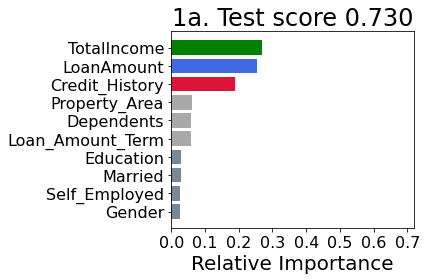

In [216]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 10
colors[9] = 'green'
colors[8] = 'royalblue'
colors[7] = 'crimson'
colors[6] = 'darkgray'
colors[5] = 'darkgray'
colors[4] = 'darkgray'
#colors[6] = 'goldenrod'
#colors[5] = 'darkorchid'#dep
#colors[4] = 'darkturquoise'#mar
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('1a. Test score 0.730', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_1a.png')
plt.show()

## 7b. Random Forest 1b: random_state = 57, n_estimators = 200, Applicant and co-applicant income separate

In [131]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", "TotalIncome", "LogTotalIncome"], axis=1)
feature_names = data.columns

In [132]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [133]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7464454976303317
Test score:  0.7304964539007093


In [134]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.20834009384037272, 'ApplicantIncome'),
 (0.20282045931498086, 'LoanAmount'),
 (0.1868579757853613, 'Credit_History'),
 (0.13408886062253778, 'CoapplicantIncome'),
 (0.05702988825560642, 'Loan_Amount_Term'),
 (0.05384119451965926, 'Dependents'),
 (0.051826856252781335, 'Property_Area'),
 (0.030622509922118134, 'Education'),
 (0.027112155911769374, 'Married'),
 (0.025539230727753406, 'Gender'),
 (0.02192077484705947, 'Self_Employed')]

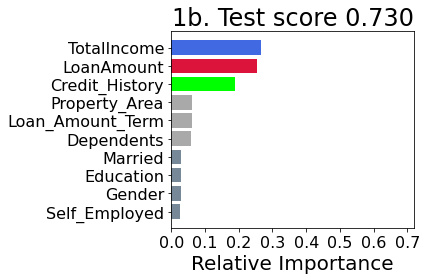

In [193]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 11
colors[10] = 'limegreen'
colors[9] = 'royalblue'
colors[8] = 'crimson'
colors[7] = 'lime'
colors[6] = 'darkgray'
colors[5] = 'darkgray'
colors[4] = 'darkgray'
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('1b. Test score 0.730', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_1b.png')
plt.show()

## 7c. Random Forest 1c: random_state = 57, n_estimators = 200, log(TotalIncome)

In [136]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", "TotalIncome", "ApplicantIncome", "CoapplicantIncome"], axis=1)
feature_names = data.columns

In [137]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [138]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7511848341232228
Test score:  0.7304964539007093


In [139]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.265457482890066, 'LogTotalIncome'),
 (0.2523096682516159, 'LoanAmount'),
 (0.19266041179612634, 'Credit_History'),
 (0.06260060059061322, 'Property_Area'),
 (0.05954707266598262, 'Dependents'),
 (0.054357376800160444, 'Loan_Amount_Term'),
 (0.029762809697480665, 'Gender'),
 (0.02921219436667838, 'Married'),
 (0.02860928378801923, 'Education'),
 (0.025483099153257388, 'Self_Employed')]

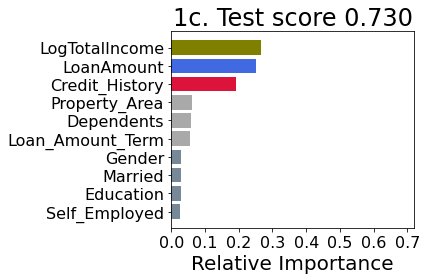

In [140]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 10
colors[9] = 'olive'
colors[8] = 'royalblue'
colors[7] = 'crimson'
colors[6] = 'darkgray'
colors[5] = 'darkgray'
colors[4] = 'darkgray'
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('1c. Test score 0.730', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_1c.png')
plt.show()

## 8a. Random Forest 2a: take out Loan_Amount_Term, random_state = 57, n_estimators = 200, Combined income

In [195]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'Loan_Amount_Term', "ApplicantIncome", "CoapplicantIncome", "LogTotalIncome"], axis=1)
feature_names = data.columns

In [196]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [197]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7511848341232228
Test score:  0.723404255319149


In [198]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.2889056815684372, 'TotalIncome'),
 (0.27072200752807424, 'LoanAmount'),
 (0.19050989709123559, 'Credit_History'),
 (0.06659071531662902, 'Property_Area'),
 (0.06206802563972226, 'Dependents'),
 (0.032407302134189915, 'Education'),
 (0.03157667783424838, 'Married'),
 (0.03028939744940441, 'Self_Employed'),
 (0.026930295438058943, 'Gender')]

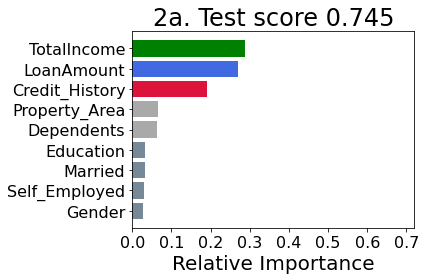

In [199]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 9
colors[8] = 'green'
colors[7] = 'royalblue'
colors[6] = 'crimson'
colors[5] = 'darkgray'
colors[4] = 'darkgray'
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('2a. Test score 0.723', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_2a.png')
plt.show()

## 8b. Random Forest 2b: take out Loan_Amount_Term, random_state = 57, n_estimators = 200, Applicant and co-applicant income separate

In [217]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'Loan_Amount_Term', "TotalIncome", "LogTotalIncome"], axis=1)
feature_names = data.columns

In [218]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [219]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7227488151658767
Test score:  0.6950354609929078


In [220]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.228648170760255, 'LoanAmount'),
 (0.22732802614136235, 'ApplicantIncome'),
 (0.1892975906828996, 'Credit_History'),
 (0.13131780679462457, 'CoapplicantIncome'),
 (0.057932369633232, 'Dependents'),
 (0.05529879173401567, 'Property_Area'),
 (0.03158076834247969, 'Education'),
 (0.028395170502735427, 'Married'),
 (0.02774931710739268, 'Gender'),
 (0.022451988301002965, 'Self_Employed')]

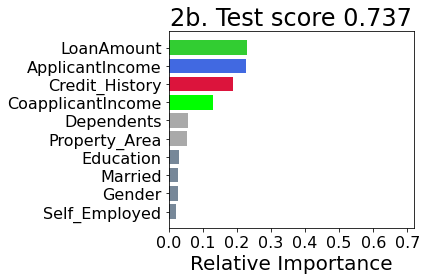

In [221]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 10
colors[9] = 'limegreen'
colors[8] = 'royalblue'
colors[7] = 'crimson'
colors[6] = 'lime'
colors[5] = 'darkgray'
colors[4] = 'darkgray'
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('2b. Test score 0.737', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_2b.png')
plt.show()

## 8c. Random Forest 2c: take out Loan_Amount_Term, random_state = 57, n_estimators = 200, log(TotalIncome)

In [151]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'Loan_Amount_Term', "TotalIncome", "ApplicantIncome", "CoapplicantIncome"], axis=1)
feature_names = data.columns

In [152]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [153]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7464454976303317
Test score:  0.7304964539007093


In [154]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.28491615637311796, 'LogTotalIncome'),
 (0.279469678992878, 'LoanAmount'),
 (0.19440573765635083, 'Credit_History'),
 (0.0621744674347919, 'Property_Area'),
 (0.06044898394955859, 'Dependents'),
 (0.03179540886881854, 'Married'),
 (0.03109691774081267, 'Education'),
 (0.028445965519659902, 'Gender'),
 (0.027246683464011743, 'Self_Employed')]

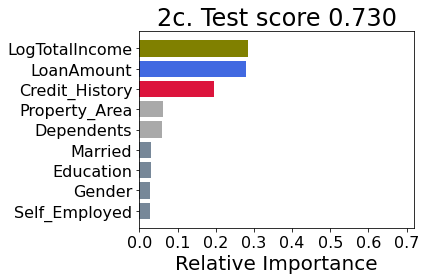

In [155]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 9
colors[8] = 'olive'
colors[7] = 'royalblue'
colors[6] = 'crimson'
colors[5] = 'darkgray'
colors[4] = 'darkgray'

plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('2c. Test score 0.730', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_2c.png')
plt.show()

## 9a. Random Forest 3a: take out Loan_Amount_Term  and LoanAmount columns, random_state = 57, n_estimators = 200, Combined income

In [222]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", 'LoanAmount', 'Loan_Amount_Term',"ApplicantIncome", "CoapplicantIncome", "LogTotalIncome"], axis=1)
feature_names = data.columns

In [223]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [224]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  0.995260663507109
Training score with oob sampling:  0.6990521327014217
Test score:  0.6808510638297872


In [225]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.5056617371867729, 'TotalIncome'),
 (0.19507034726610276, 'Credit_History'),
 (0.08488868111335127, 'Dependents'),
 (0.07989983907006151, 'Property_Area'),
 (0.034684833364730036, 'Education'),
 (0.03353565993022944, 'Self_Employed'),
 (0.033132903373395084, 'Married'),
 (0.033125998695357074, 'Gender')]

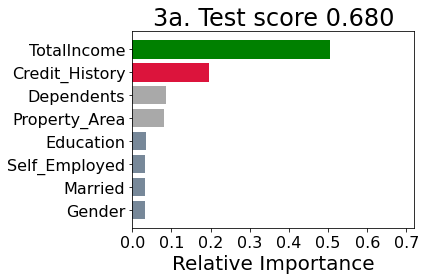

In [226]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 8
colors[7] = 'green'
colors[6] = 'crimson'
colors[5] = 'darkgray'
colors[4] = 'darkgray'
plt.title('3a. Test score 0.680', fontsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_3a.png')
plt.show()



## 9b. Random Forest 3b: take out Loan_Amount_Term  and LoanAmount columns, random_state = 57, n_estimators = 200, Applicant and co-applicant income separate

In [161]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", 'LoanAmount', 'Loan_Amount_Term',"TotalIncome", "LogTotalIncome"], axis=1)
feature_names = data.columns

In [162]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [163]:
 # Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  0.995260663507109
Training score with oob sampling:  0.7227488151658767
Test score:  0.7021276595744681


In [164]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.3399324816511817, 'ApplicantIncome'),
 (0.2031132387916145, 'Credit_History'),
 (0.18950570382366197, 'CoapplicantIncome'),
 (0.0739601558490099, 'Dependents'),
 (0.06557450181351254, 'Property_Area'),
 (0.0354209467117105, 'Education'),
 (0.03287771961420504, 'Married'),
 (0.0302975277438668, 'Gender'),
 (0.02931772400123718, 'Self_Employed')]

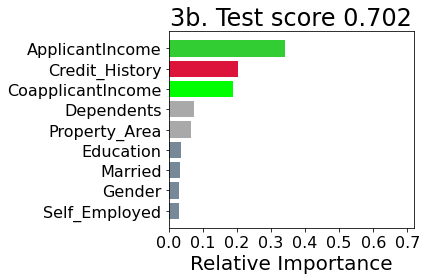

In [165]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 9
colors[8] = 'limegreen'
colors[7] = 'crimson'
colors[6] = 'lime'
colors[5] = 'darkgray'
colors[4] = 'darkgray'
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('3b. Test score 0.702', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_3b.png')
plt.show()



## 9c. Random Forest 3b: take out Loan_Amount_Term  and LoanAmount columns, random_state = 57, n_estimators = 200, log(TotalIncome)

In [227]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", 'LoanAmount', 'Loan_Amount_Term',"TotalIncome", "ApplicantIncome", "CoapplicantIncome"], axis=1)
feature_names = data.columns

In [228]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [229]:
 # Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  0.995260663507109
Training score with oob sampling:  0.7085308056872038
Test score:  0.6666666666666666


In [230]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.4999669510661273, 'LogTotalIncome'),
 (0.20183828445384341, 'Credit_History'),
 (0.08631400013463207, 'Dependents'),
 (0.08124189014744261, 'Property_Area'),
 (0.03676881668433072, 'Education'),
 (0.03296596063774398, 'Married'),
 (0.03163072443607001, 'Self_Employed'),
 (0.029273372439809757, 'Gender')]

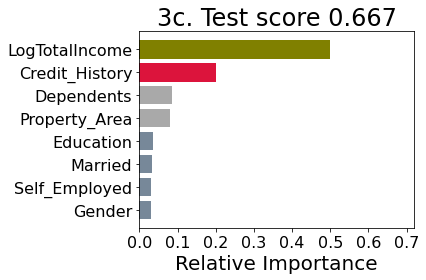

In [231]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 8
colors[7] = 'olive'
colors[6] = 'crimson'
colors[5] = 'darkgray'
colors[4] = 'darkgray'
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('3c. Test score 0.667', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_3c.png')
plt.show()

## 10a. Random Forest 4a: , random_state = 57, n_estimators = 200, take out Loan_Amount_Term and LoanAmount columns, also remove columns with lower importance in previous runs ( 'Gender', 'Education', 'Self_Employed', 'Married') - Combined incomes

In [232]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', 'Gender', 'Education', 'Self_Employed', 'Married', "ApplicantIncome", "CoapplicantIncome", "LogTotalIncome" ], axis=1)
feature_names = data.columns

In [233]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [234]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  0.995260663507109
Training score with oob sampling:  0.6611374407582938
Test score:  0.7021276595744681


In [235]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.6626749701031451, 'TotalIncome'),
 (0.20460240827919768, 'Credit_History'),
 (0.06778143482469134, 'Dependents'),
 (0.0649411867929658, 'Property_Area')]

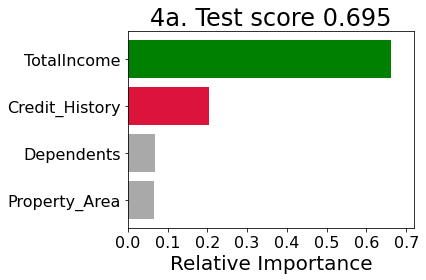

In [236]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 4
colors[3] = 'green'
colors[2] = 'crimson'
colors[1] = 'darkgray'
colors[0] = 'darkgray'
plt.title('4a. Test score 0.695', fontsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_4a.png')
plt.show()



## 10b. Random Forest 4b: , random_state = 57, n_estimators = 200, take out Loan_Amount_Term and LoanAmount columns, also remove columns with lower importance in previous runs ( 'Gender', 'Education', 'Self_Employed', 'Married') - Applicant and co-applicant income separate

In [237]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', 'Gender', 'Education', 'Self_Employed', 'Married', "TotalIncome", "LogTotalIncome"], axis=1)
feature_names = data.columns

In [238]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [239]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  0.995260663507109
Training score with oob sampling:  0.6943127962085308
Test score:  0.7092198581560284


In [240]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.4539547588156006, 'ApplicantIncome'),
 (0.21629050825252405, 'CoapplicantIncome'),
 (0.201895101835185, 'Credit_History'),
 (0.067486012045605, 'Dependents'),
 (0.06037361905108535, 'Property_Area')]

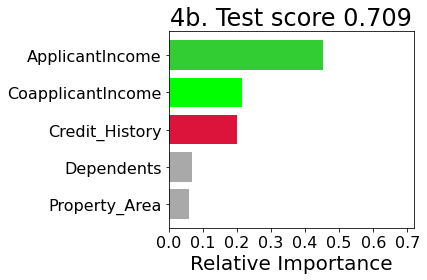

In [241]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 5
colors[4] = 'limegreen'
colors[3] = 'lime'
colors[2] = 'crimson'
colors[1] = 'darkgray'
colors[0] = 'darkgray'
plt.title('4b. Test score 0.709', fontsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_4b.png')
plt.show()


## 10c. Random Forest 4c: , random_state = 57, n_estimators = 200, take out Loan_Amount_Term and LoanAmount columns, also remove columns with lower importance in previous runs ( 'Gender', 'Education', 'Self_Employed', 'Married') - Log(TotalIncome)

In [181]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', 'Gender', 'Education', 'Self_Employed', 'Married', "TotalIncome",  "ApplicantIncome", "CoapplicantIncome"], axis=1)
feature_names = data.columns

In [182]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [183]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  0.995260663507109
Training score with oob sampling:  0.6706161137440758
Test score:  0.6808510638297872


In [184]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.6692896185030719, 'LogTotalIncome'),
 (0.20445227828955137, 'Credit_History'),
 (0.06823821035144378, 'Dependents'),
 (0.05801989285593296, 'Property_Area')]

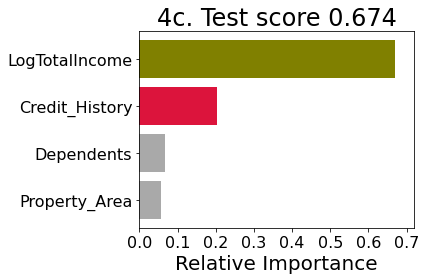

In [185]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 4
colors[3] = 'olive'
colors[2] = 'crimson'
colors[1] = 'darkgray'
colors[0] = 'darkgray'
plt.title('4c. Test score 0.681', fontsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_4c.png')
plt.show()
